In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68390_R')

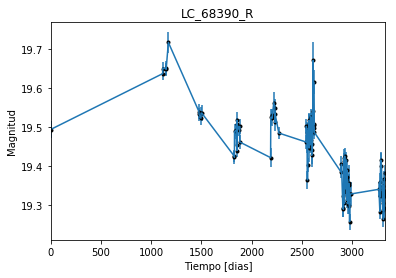

In [2]:
data = np.genfromtxt('LC_68390_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68390_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

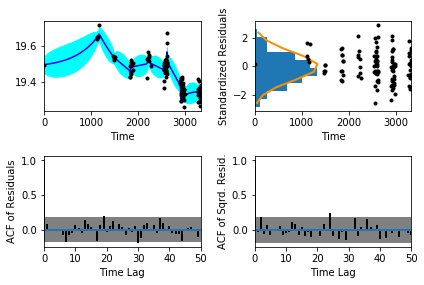

In [5]:
sample.assess_fit()

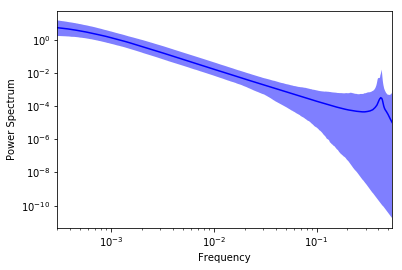

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68390_R')

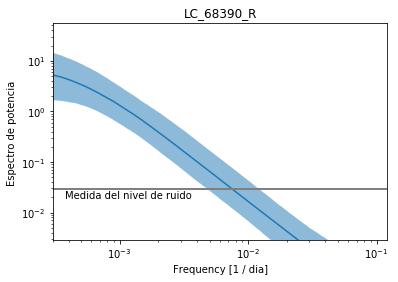

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68390_R')

Text(0.5,1,'Prediccion , valor esperado 68390_R')

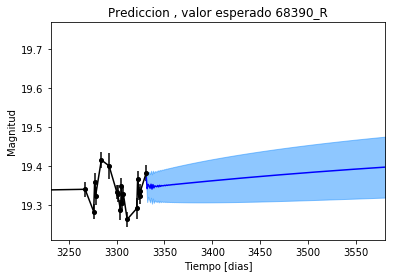

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 68390_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_68390_R')

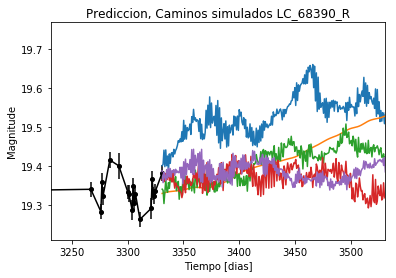

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68390_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68390_R')

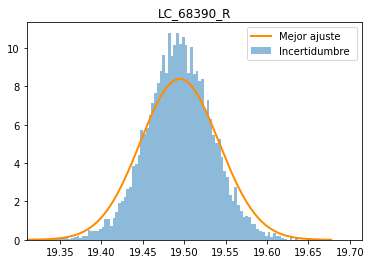

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68390_R')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_R')

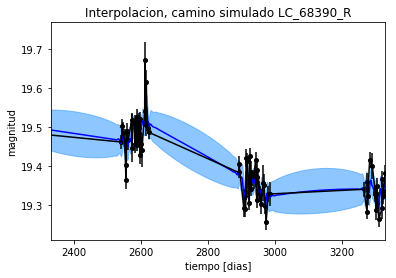

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_R')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_R')

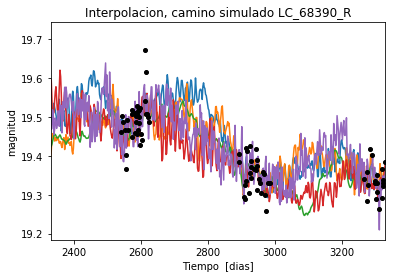

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 226.7078582
Median: 0.00854114512865
Standard deviation: 0.11015359779
68% credibility interval: [ 0.00312218  0.03731798]
95% credibility interval: [ 0.0004672   0.41940567]
99% credibility interval: [  3.28293694e-04   7.46734077e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 166.935269284
Median: 0.0083912396377
Standard deviation: 0.0895637161918
68% credibility interval: [ 0.0030415   0.03403686]
95% credibility interval: [ 0.00045006  0.33237326]
99% credibility interval: [  3.28293694e-04   6.00607742e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 131.672172879
Median: 0.383093124037
Standard deviation: 0.3

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 258.726720781
Median: 262.459617213
Standard deviation: 3.01511776523
68% credibility interval: [ 258.3358319   264.50680124]
95% credibility interval: [ 254.65616136  265.77404279]
99% credibility interval: [ 252.36507415  267.02134085]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 154.327175298
Median: 2.7976694088
Standard deviation: 2.38355647268
68% credibility interval: [ 0.77838064  5.57212386]
95% credibility interval: [ 0.15858783  8.23099035]
99% credibility interval: [  0.06254713  12.96738177]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 138.463067951
Median: 7.5697568899
Standard deviation: 11.8230890141
68% credibility interval: [  6.44582159  14.42499876]
95% credibility interval: [  0.36703594  5

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19556.7021933
Median: 6.08847507264e-21
Standard deviation: 9941.43390502
68% credibility interval: [  1.35250992e-44   2.23148134e+00]
95% credibility interval: [  1.56155407e-98   2.92452243e+01]
99% credibility interval: [  4.80155831e-111   1.02717510e+003]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 912.034661532
Median: 19.4769255871
Standard deviation: 0.0494762747192
68% credibility interval: [ 19.4316484   19.52447894]
95% credibility interval: [ 19.37889106  19.57773961]
99% credibility interval: [ 19.34244278  19.61970689]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 180.79205643
Median: 0.429227543024
Standard deviation: 0.181953437624
68% credibility interval: [ 0.39231929  0.58484471]
95% credibility interval: [ 0.03503901  0.94873195]
99% credibility interval: [ 0.          1.07326611]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 180.79205643
Median: 0.429227543024
Standard deviation: 0.181953437624
68% credibility interval: [ 0.39231929  0.58484471]
95% credibility interval: [ 0.03503901  0.94873195]
99% credibility interval: [ 0.          1.07326611]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 288.323948726
Median: 0.0
Standard deviation: 0.000115420922586
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 258.726720781
Median: 262.459617213
Standard deviation: 3.01511776523
68% credibility interval: [ 258.3358319   264.50680124]
95% credibility interval: [ 254.65616136  265.77404279]
99% credibility interval: [ 252.36507415  267.02134085]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 323.647555241
Median: 0.0115562817264
Standard deviation: 0.0062030927778
68% credibility interval: [ 0.00746611  0.0176818 ]
95% credibility interval: [ 0.0052055   0.02814704]
99% credibility interval: [ 0.0043243   0.03810824]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 207.665723427
Median: 1.62314491548
Standard deviation: 0.293514185341
68% credibility interval: [ 1.25787669  1.89559227]
95% credibility interval: [ 0.93876503  1.98547348]
99% credibility interval: [ 0.79679465  1.99549172]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 120.852460144
Median: 0.157806992773
Standard deviation: 0.323236291452
68% credibility interval: [ 0.01589113  0.45879756]
95% credibility interval: [  2.71883347e-04   1.04094340e+00]
99% credibility interval: [  4.32749567e-05   2.17531682e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 226.7078582
Median: (-0.0536655975788-2.70185572064j)
Standard deviation: 1.33642729026
68% credibility interval: [-0.23447581-3.72345818j -0.01961725-2.69112729j]
95% credibility interval: [-2.63520352-6.24562749j -0.00293551-4.46780861j]
99% credibility interval: [ -4.69186858e+00-3.23221352j  -2.06273011e-03-2.71474593j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 166.935269284
Median: (-0.0527237136006+3.7568372217j)
Standard deviation: 1.27424349962
68% credibility interval: [-0.21385988+3.48114288j -0.01911031+3.62648316j]
95% credibility interval: [-2.08836281+4.3398459j  -0.00282783+2.68630277j]
99% credibility interval: [ -3.77372974e+00+4.67295509j  -2.06273011e-03+2.71474593j]
Posterior summary for param